In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
insurance_df = pd.read_csv('insurance_claims.csv')

In [3]:
# Data preparation
insurance_df.isnull().sum()

# Extract features and target variable
X = insurance_df.drop('fraud_reported' and '_c39', axis=1)
y = insurance_df['fraud_reported']

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalize numerical featuries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Chose of model: RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [5]:
# Train model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           N       0.92      1.00      0.96       145
           Y       1.00      0.78      0.88        55

    accuracy                           0.94       200
   macro avg       0.96      0.89      0.92       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[145   0]
 [ 12  43]]
Accuracy Score: 0.94


In [7]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93  0.93  0.925 0.91  0.99 ]
Mean Accuracy: 0.937


In [8]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_encoded, y)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [9]:
# Model deployment
import joblib

# Save the trained model
joblib.dump(model, 'fraud_detection_model.joblib')

# Later, load the model for predictions
loaded_model = joblib.load('fraud_detection_model.joblib')


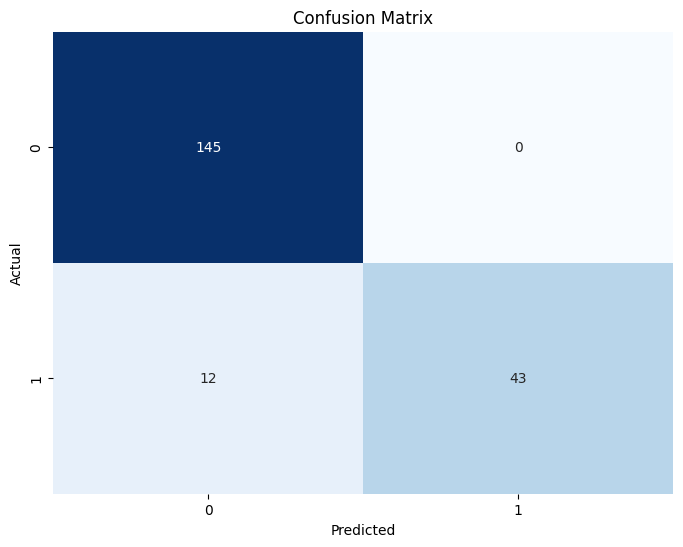

In [11]:
# Model performance visualized

# Confusion matrix heat map
# Assuming y_test and y_pred are your true labels and predicted labels, respectively
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()